In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
%store -r te

In [3]:
# Create arrays for the features and the response variable
# New rb to test float v ints

new_te = te.drop(columns=['Player','Tm','FantPos','Cmp','Att','Yds',
                          'TD','Int','DKPt','FDPt','VBD',
                          'PosRank','OvRank'],axis=1)

new_te['FantPt'] = new_te['FantPt'].astype(np.int64)
new_te['Year'] = new_te['Year'].astype(np.int64)

In [4]:
# Get rid of current year points and shift up next years FantPts
y_te = new_te['FantPt']
conv_years = [1 if values == 2018 else 0 for values in new_te.Year]
new_te['Year'] = conv_years
X_te = new_te.drop(columns=['FantPt'],axis=1)

In [5]:
X_te.head()

,Age,G,GS,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,PPR,Year
0,29,16,16,0,0,0.00,0,150,103,1336,12.97,10,2,1,10,0.0,0.0,294.6,1
1,25,16,16,1,10,10.00,0,136,88,1377,15.65,5,0,0,5,1.0,0.0,258.7,1
2,28,16,16,0,0,0.00,0,156,116,1163,10.03,8,1,0,8,0.0,0.0,280.3,1
3,25,16,8,3,-8,-2.67,1,110,66,750,11.36,13,1,1,14,0.0,0.0,222.2,1
4,31,16,14,0,0,0.00,0,101,68,896,13.18,6,0,0,6,0.0,0.0,193.6,1


In [6]:
y_te.head()

0    192
1    171
2    164
3    156
4    126
Name: FantPt, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_te, y_te, test_size=0.25,
                                                    random_state=411)

In [8]:
# Creating Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# Scoring the Linear Regression Model
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print("Linear Regression Train Score:", train_score.round(7))
print("Linear Regression Test Score:", test_score.round(7))
# Predict on the test data: y_pred
y_pred = lr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Linear Regression Train Score: 0.9996157
Linear Regression Test Score: 0.9994718
Root Mean Squared Error: 0.83086


In [9]:
# Random Forest Regression Scores
rf = RandomForestRegressor(n_estimators=2000)
rf.fit(X_train, y_train)
# Scoring the Random Forrest Regression Model
RF_train_score = rf.score(X_train,y_train)
RF_test_score = rf.score(X_test, y_test)
print("Random Forest Regression Train Score:", RF_train_score.round(7))
print("Random Forest Regression Test Score:", RF_test_score.round(7))
# Predict on the test data: y_pred_rf
y_pred_rf = rf.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Random Forest Regression Train Score: 0.9952217
Random Forest Regression Test Score: 0.9711633
Root Mean Squared Error: 6.139


In [10]:
# Random Forest Regression does not have coefficients so we cannot visualize

In [11]:
# Creating Ridge Regression Model - Low Alpha
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
coeff_used01 = np.sum(rr.coef_!=0)
print("Ridge Regression Train Score Low Alpha:", Ridge_train_score.round(7))
print("Ridge Regression Test Score Low Alpha:", Ridge_test_score.round(7))
print("Number of Features Used for Alpha=0.01:", coeff_used01)
# Predict on the test data: y_pred
y_pred_rr = rr.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Ridge Regression Train Score Low Alpha: 0.9996156
Ridge Regression Test Score Low Alpha: 0.9994719
Number of Features Used for Alpha=0.01: 18
Root Mean Squared Error: 0.83075


In [12]:
# Ridge Regression Analysis - High Alpha
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)
# Scoring the Ridge Regression Model
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
coeff_used100 = np.sum(rr100.coef_!=0)
print("Ridge Regression Train Score High Alpha:", Ridge_train_score100.round(7))
print("Ridge Regression Test Score High Alpha:", Ridge_test_score100.round(7))
print("Number of Features Used for Alpha=100:", coeff_used100)
# Predict on the test data: y_pred
y_pred_rr100 = rr100.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr100))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Ridge Regression Train Score High Alpha: 0.9995581
Ridge Regression Test Score High Alpha: 0.9994041
Number of Features Used for Alpha=100: 18
Root Mean Squared Error: 0.8825


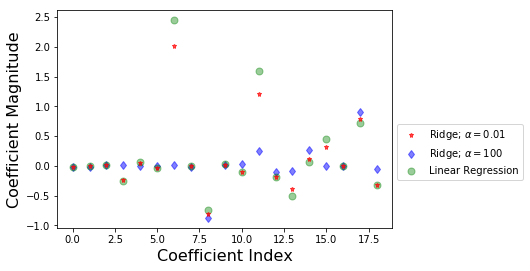

In [13]:
# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Ridge Regression Coefficient - High Alpha
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,
         color='blue',label=r'Ridge; $\alpha = 100$') 

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
# This plot is a viual display of how the lower alpha better fits our dataset

In [15]:
# Lasso Scores for 0.01 Alpha
lasso01 = Lasso(alpha=0.01, max_iter=10e5)
lasso01.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score01=lasso01.score(X_train,y_train)
test_score01=lasso01.score(X_test,y_test)
coeff_used01 = np.sum(lasso01.coef_!=0)
print("Lasso Training Score for Alpha=0.01:", train_score01.round(7))
print("Lasso Test Score for Alpha=0.01:", test_score01.round(7))
print("Number of Features Used for Alpha=0.01:", coeff_used01)
# Predict on the test data: y_pred_lasso01
y_pred_lasso01 = lasso01.predict(X_test)
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso01))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.01: 0.9996061
Lasso Test Score for Alpha=0.01: 0.9994821
Number of Features Used for Alpha=0.01: 14
Root Mean Squared Error: 0.82274


In [16]:
# Lasso Scores for 0.0001 Alpha
lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
# Scoring the Lasso Regression Model
train_score0001 = lasso0001.score(X_train,y_train)
test_score0001 = lasso0001.score(X_test,y_test)
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print("Lasso Training Score for Alpha=0.0001:", train_score0001.round(7))
print("Lasso Test Score for Alpha=0.0001: ", test_score0001.round(7))
print("Number of Features Used for Alpha=0.0001:", coeff_used0001)
# Predict on the test data: y_pred_lasso0001
y_pred_lasso0001 = lasso0001.predict(X_test)
# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso0001))
print("Root Mean Squared Error: {}".format(rmse.round(5)))

Lasso Training Score for Alpha=0.0001: 0.9996156
Lasso Test Score for Alpha=0.0001:  0.9994718
Number of Features Used for Alpha=0.0001: 18
Root Mean Squared Error: 0.83085


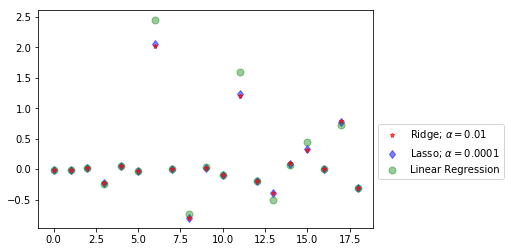

In [17]:
# Linear Regression scores plot with Ridge Regression & Lasso Coefficient

# Plot for Ridge Regression Coefficient - Low Alpha
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Plot for Lasso Regression Coefficient - Alpha 0.0001
plt.plot(lasso0001.coef_,alpha=0.5,linestyle='none',marker='d',
         markersize=6,color='blue',label=r'Lasso; $\alpha = 0.0001$')

# Plot for Linear Regression Coefficient
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,
         color='green',label='Linear Regression')

plt.legend(bbox_to_anchor=(1, 0.5))

In [18]:
# Ridge Regression with the lowest Alpha (0.01) gives us the best fit
# for this dataset. For this dataset it scores better than Linear Regression
# The Random Forest Regression model was the worst of all the models tested
# Lasso Regression with the lowest Alpha (0.0001) was very close behind Ridge

In [19]:
# Predicting TEs with Linear Regression
top15_tes = X_te[:15]
y_top15_tes = lr.predict(top15_tes)
# Creating DataFrame to Visualize Prediction Results
y_top15_tes = pd.DataFrame(y_top15_tes)
te_names = te['Player'][:15]
frames = [te_names, y_top15_tes]
te_names_pred = pd.concat(frames, axis=1)
te_names_pred.columns = ['Player', 'Predicted FantPt']
te_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Travis Kelce,191.252288
1,George Kittle,170.310923
2,Zach Ertz,163.962005
3,Eric Ebron,156.151799
4,Jared Cook,125.592092
5,Trey Burton,92.829350
6,Austin Hooper,91.924162
7,David Njoku,88.091586
8,Kyle Rudolph,87.535941
9,O.J. Howard,86.409738


In [20]:
# Predicting TEs with Ridge Regression
top15_tes = X_te[:15]
y_top15_tes = rr.predict(top15_tes)
# Creating DataFrame to Visualize Prediction Results
y_top15_tes = pd.DataFrame(y_top15_tes)
te_names = te['Player'][:15]
frames = [te_names, y_top15_tes]
te_names_pred = pd.concat(frames, axis=1)
te_names_pred.columns = ['Player', 'Predicted FantPt']
te_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Travis Kelce,191.253038
1,George Kittle,170.320401
2,Zach Ertz,163.966030
3,Eric Ebron,156.163570
4,Jared Cook,125.593960
5,Trey Burton,92.835347
6,Austin Hooper,91.921327
7,David Njoku,88.092789
8,Kyle Rudolph,87.537641
9,O.J. Howard,86.410441


In [21]:
# Predicting TEs with Lasso Regression
top15_tes = X_te[:15]
y_top15_tes = lasso0001.predict(top15_tes)
# Creating DataFrame to Visualize Prediction Results
y_top15_tes = pd.DataFrame(y_top15_tes)
te_names = te['Player'][:15]
frames = [te_names, y_top15_tes]
te_names_pred = pd.concat(frames, axis=1)
te_names_pred.columns = ['Player', 'Predicted FantPt']
te_names_pred.sort_values(['Predicted FantPt'],ascending=False)

,Player,Predicted FantPt
0,Travis Kelce,191.254468
1,George Kittle,170.320640
2,Zach Ertz,163.965790
3,Eric Ebron,156.164678
4,Jared Cook,125.593961
5,Trey Burton,92.835860
6,Austin Hooper,91.920886
7,David Njoku,88.092536
8,Kyle Rudolph,87.537819
9,O.J. Howard,86.410941
